In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import warnings as w
import sys
sys.path.append("../../..")
import Thermobar as pt

In [1]:
out_train=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Train_Thermobar_Format')
out_train_input=out_train['my_input']
Cpx_train=out_train['Cpxs']
Cpx_train['H2O_Liq']=out_train_input['H2O_Liq'].fillna(0)
Cpx_train_noID_noT=Cpx_train.drop(['Sample_ID_Cpx'], axis=1)
x_train=Cpx_train_noID_noT.values
y_train_T=out_train_input['T_K']
y_train_P=out_train_input['P_GPa']*10

NameError: name 'pt' is not defined

In [3]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')

out_test_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Cpx_test['H2O_Liq']=out_test_input['H2O_Liq'].fillna(0)
Cpx_test_noID_noT=Cpx_test.drop(['Sample_ID_Cpx'], axis=1)
x_test=Cpx_test_noID_noT.values
y_test_T=out_test_input['T_K']
y_test_P=out_test_input['P_GPa']*10

In [ ]:
Cpx_test_noID_noT

In [4]:
# Scaling
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

# Define the regressor, in our case the Extra Tree Regressor
regr_T = ExtraTreesRegressor(n_estimators=450, criterion='mse', max_features=11, random_state=120) # random_state fixed for reproducibility

# Define the regressor, in our case the Extra Tree Regressor
regr_P = ExtraTreesRegressor(n_estimators=450, criterion='mse', max_features=11, random_state=120) # random_state fixed for reproducibility

# Train the model
regr_T.fit(x_train_scaled, y_train_T.ravel())
regr_P.fit(x_train_scaled, y_train_P.ravel())

ExtraTreesRegressor(max_features=11, n_estimators=450, random_state=120)

In [5]:
x_test_scaled=scaler.transform(x_test)

## Predicting the test data for temp

'RMSE= 73.6464'

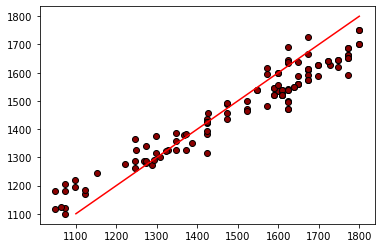

In [6]:
predicted_T=regr_T.predict(x_test_scaled)
plt.plot( y_test_T, predicted_T, 'ok', mfc='darkred')
plt.plot([1100, 1800], [1100, 1800], '-r')
Stats_T=pt.calculate_R2_np(y_test_T.values, predicted_T)
Stats_T['R2']
Stats_T['RMSE']

## Predicting the test data for Press

'RMSE= 3.17955'

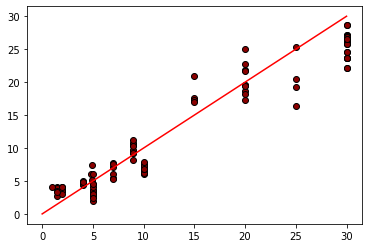

In [7]:
predicted_P=regr_P.predict(x_test_scaled)
plt.plot( y_test_P, predicted_P, 'ok', mfc='darkred')
plt.plot([0, 30], [0, 30], '-r')
Stats_P=pt.calculate_R2_np(y_test_P.values, predicted_P)
Stats_P['R2']
Stats_P['RMSE']

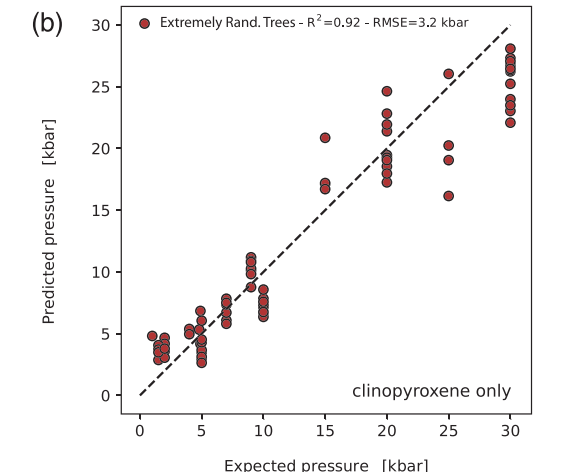

In [8]:
scaler

StandardScaler()

In [9]:
from pickle import dump
import pickle
dump(scaler, open('scaler_Petrelli2020_Cpx_Only_H2O.pkl', 'wb'))
dump(regr_P, open('ETR_Press_Petrelli2020_Cpx_Only_H2O.pkl', 'wb'))
dump(regr_T, open('ETR_Temp_Petrelli2020_Cpx_Only_H2O.pkl', 'wb'))


In [11]:
from pickle import load
scaler_P2020_Cpx_Only=load(open('scaler_Petrelli2020_Cpx_Only_H2O.pkl', 'rb'))
ETR_Temp_P2020_Cpx_Only=load(open('ETR_Temp_Petrelli2020_cpx_Only_H2O.pkl', 'rb'))
ETR_Press_P2020_Cpx_Only=load(open('ETR_Press_Petrelli2020_cpx_Only_H2O.pkl', 'rb'))

## Predicting from Thermobar

In [13]:
pd.read_excel(r'../../../Thermobar/TestLoad.xlsx')

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,5.0
2,NaN,NaN,1.0


In [14]:
load(open(r'../../../Thermobar/ETR_Press_Petrelli2020_Cpx_Only.pkl', 'rb'))

TypeError: ("(open(r'../../../Thermobar/ETR_Press_Petrelli2020_Cpx_Only.pkl', 'rb')) is neither a string nor a macro.", <_io.BufferedReader name='../../../Thermobar/ETR_Press_Petrelli2020_Cpx_Only.pkl'>)

In [5]:

P_func=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, equationP="P_Petrelli2021_Cpx_only")
plt.plot(predicted_P, P_func, 'ok')
P_func.head()

FileNotFoundError: [Errno 2] No such file or directory: 'scaler_Petrelli2020_Cpx_Only.pkl'

(119, 10)


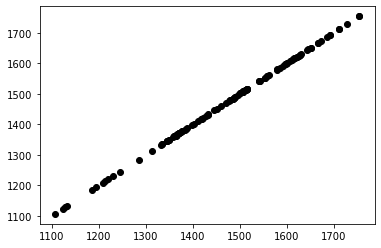

In [11]:
T_func=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test,  equationT="T_Petrelli2021_Cpx_only")
plt.plot(predicted_T, T_func, 'ok')

In [12]:
PT_func=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,  
                                         equationT="T_Petrelli2021_Cpx_only",
                                        equationP="P_Petrelli2021_Cpx_only")
PT_func

Youve selected a P-independent function
(119, 10)
Youve selected a T-independent function


,P_kbar_calc,T_K_calc
0,3.855222,1193.360000
1,4.558327,1219.543333
2,4.031024,1106.043333
3,10.384876,1421.136667
4,11.319707,1396.871111
...,...,...
114,2.637991,1377.170000
115,5.018701,1470.411111
116,4.550104,1363.161111
117,23.530222,1558.198889


In [13]:
PT_func=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,  
                                         equationT="T_Put2008_eq32d",
                                        equationP="P_Petrelli2021_Cpx_only")
PT_func

Youve selected a T-independent function


,P_kbar_calc,T_K_calc
0,3.855222,1332.821244
1,4.558327,1374.848885
2,4.031024,1301.557376
3,10.384876,1511.637966
4,11.319707,1510.945920
...,...,...
114,2.637991,1438.954192
115,5.018701,1459.731365
116,4.550104,1389.452805
117,23.530222,1634.100984
